# Maxwell-Boltzmann Distribution

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

According to the Maxwell-Boltzmann (MB) distribution, in an isolated system at equilibrium, all microstates are equally probable, following the principle of equiprobability. The MB distribution applies to classical particles, where each configuration with the same energy has an equal probability of occurring.

In [2]:
class Particle:
    def __init__(self, pos, sigma) -> None:
        self.pos = pos
        self.sigma = sigma

In [3]:
def generate_particles(N, sigma, box_width, box_height):
    particle_lst = [Particle(np.array([box_width/2, box_height/2]), sigma)]
    n = 1
    while (n < N):
        is_overlap = False
        x = random.uniform(sigma, box_width-sigma)
        y = random.uniform(sigma, box_height-sigma)
        for particle in particle_lst:
            if (x - particle.pos[0])**2 + (y - particle.pos[1])**2 < (2*sigma)**2:
                is_overlap = True
                break
        if is_overlap == False:
            particle_lst.append(Particle(np.array([x, y]), sigma))
            n += 1

    return particle_lst

In [4]:
def mb_markov(N, particle_lst, delta, num_iter):
    num_success = 0
    for i in range(num_iter):
        k = random.randint(0, N-1)
        delta_Xk = np.array([random.uniform(-delta, delta), random.uniform(-delta, delta)])
        new_pos = particle_lst[k].pos + delta_Xk
        is_overlap = False
        for particle in particle_lst:
            if (new_pos[0] - particle.pos[0])**2 + (new_pos[1] - particle.pos[1])**2 < (2*particle.sigma)**2:
                is_overlap = True
                break
        if is_overlap == False:
            particle.pos = new_pos
            num_success += 1
    return num_success, num_iter

In [5]:
box_height, box_width = 2, 2
sigma = 0.01
num_iter = 10000
delta = 0.1
V = box_width*box_height

In [6]:
N_arr = np.arange(50, 300, 10)
eta = (4*np.pi*(sigma**2)*N_arr) / V
prob_accept = []
for N in N_arr:
    particle_lst = generate_particles(N, sigma, box_width, box_height)
    num_success, _ = mb_markov(N, particle_lst, delta, num_iter)
    prob_accept.append(num_success/num_iter)

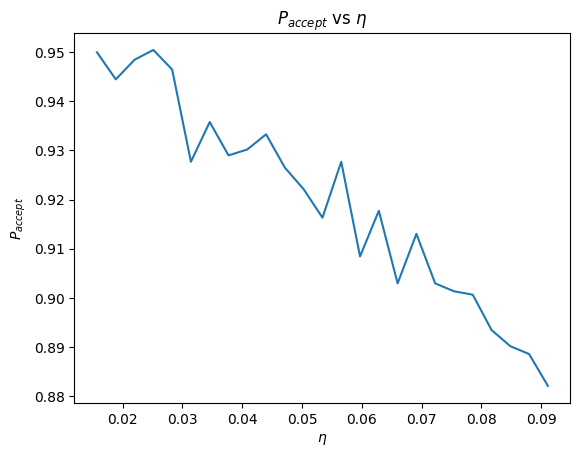

In [7]:
plt.figure()
plt.plot(eta, prob_accept)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$P_{accept}$")
plt.title(r"$P_{accept}$ vs $\eta$")
plt.show()

## Markov-Chain and direct sampling algorithms for an ideal gas at constant pressure

The Markov-Chain algorithm for an ideal gas at constant pressure is used to sample configurations of a system where gas particles interact with a piston. The algorithm adjusts the length $L$ (which represents the position of the piston) by generating random changes $\Delta$, and accepting these changes based on a probability proportional to the Boltzmann factor $exp(−\beta P \Delta)$. This method ensures that the system explores different possible states while maintaining the desired statistical properties of an ideal gas under constant pressure. The algorithm, derived from the Metropolis method, uses random sampling to determine the movement of the piston and ensures that the system remains within physically allowable boundaries.

<img src="./imgs/constp_markov.png" alt="Markov-Chain algorithm for an ideal gas at constant pressure" width="400"/>

In [8]:
def constp_markov(L, N, delta, P_beta):
    particles = np.array([np.random.uniform(0, L) for _ in range(N)])
    x_max = max(particles)
    delta_L = np.random.uniform(-delta, delta)
    Upsilon = np.exp(-P_beta * delta_L)

    random_number = np.random.uniform(0, 1)
    if random_number < Upsilon and L + delta_L > x_max:
        L += delta_L

    return L, particles

In [9]:
def run_markov_chain(L_initial, N, delta, P_beta, num_iterations):
    L_values = []
    L = L_initial
    for _ in range(num_iterations):
        L, particles = constp_markov(L, N, delta, P_beta)
        L_values.append(L)
    mean_L = np.mean(L_values)
    return mean_L

The Direct Sampling Algorithm for an ideal gas at constant pressure simplifies the process of generating gas configurations by directly sampling from the known Boltzmann distributions of the system. In the case of an ideal gas under constant pressure, the algorithm selects configurations by generating random values for $\Delta$, based on the Boltzmann distribution.

<img src="./imgs/constp_direct.png" alt="Direct Sampling Algorithm for an ideal gas at constant pressure" width="400"/>

In [10]:
def direct_sampling(L, N, P_beta):
    particles = np.array([np.random.uniform(0, L) for _ in range(N)])
    x_max = max(particles)
    delta_L = -np.log(np.random.uniform(0, 1)) / P_beta
    L = x_max + delta_L

    return L, particles

In [11]:
def run_direct_sampling(L_initial, N, P_beta, num_iterations):
    L_values = []
    L = L_initial
    for _ in range(num_iterations):
        L, particles = direct_sampling(L, N, P_beta)
        L_values.append(L)
    mean_L = np.mean(L_values)
    return mean_L

In [12]:
P_beta = 1
initial_L = 10

configurations = [
    (4, 0.1, [100, 1000, 10000, 1000000]),
    (4, 1, [100, 1000, 10000, 1000000]),
    (6, 0.1, [100, 1000, 10000, 1000000]),
    (6, 1, [100, 1000, 10000, 1000000]),
    (10, 0.1, [100, 1000, 10000, 1000000]),
    (10, 1, [100, 1000, 10000, 1000000])
]

results = []
for N, delta, iterations_list in configurations:
    for num_iterations in iterations_list:
        expected_mean_L = (N+1) / P_beta
        markov_mean_L = run_markov_chain(initial_L, N, delta, P_beta, num_iterations)
        direct_mean_L = run_direct_sampling(initial_L, N, P_beta, num_iterations)
        results.append((N, delta, num_iterations, expected_mean_L, markov_mean_L, direct_mean_L))

for result in results:
    print(f"N: {result[0]}, delta: {result[1]}, iterations: {result[2]}, Expected L: {result[3]}, Markov L: {result[4]}, Direct L: {result[5]}")


N: 4, delta: 0.1, iterations: 100, Expected L: 5.0, Markov L: 9.756149315429019, Direct L: 5.085624730134454
N: 4, delta: 0.1, iterations: 1000, Expected L: 5.0, Markov L: 10.276329811963794, Direct L: 5.25149846512829
N: 4, delta: 0.1, iterations: 10000, Expected L: 5.0, Markov L: 8.454124818380292, Direct L: 5.084741980202623
N: 4, delta: 0.1, iterations: 1000000, Expected L: 5.0, Markov L: 5.090260618754481, Direct L: 5.008221845216423
N: 4, delta: 1, iterations: 100, Expected L: 5.0, Markov L: 11.835864347103648, Direct L: 4.452999902762633
N: 4, delta: 1, iterations: 1000, Expected L: 5.0, Markov L: 6.367389473377006, Direct L: 5.348808716288024
N: 4, delta: 1, iterations: 10000, Expected L: 5.0, Markov L: 4.7220612196577365, Direct L: 4.985464827468018
N: 4, delta: 1, iterations: 1000000, Expected L: 5.0, Markov L: 4.989719029101625, Direct L: 4.992966718586171
N: 6, delta: 0.1, iterations: 100, Expected L: 7.0, Markov L: 10.164858183593124, Direct L: 7.3530266318495645
N: 6, del